<a href="https://colab.research.google.com/github/MatiasMala/Entrega-1/blob/main/ProyectoDS2_Laboratoria_Salud_Matias_Malajovich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="left">
<img src="https://uploads-ssl.webflow.com/5f4d2915aacbff8a3255cf1b/60b68f6a34b2e95700900f3b_coderhouse-logo.svg" height=50>
</div>

# Proyecto Final Data Science "Laboratoria Salud"

## 1. Objetivo del análisis

En este proyecto realizaremoss un análisis descriptivo del comportamiento de un grupo de asegurados que fueron invitados a pertenecer a un programa de prevención de enfermedades crónicas. Tendrás que validar si existen algunas oportunidades de mejora dentro del programa para que el negocio se pueda gestionar mejor.

Preguntas Clave:


*   ¿Dentro de que rango de edad se encuentran las personas que denuncian esta
clase de siniestros?

Hipótesis: El rango de edad esta entre los 60 y 80 años

*  ¿Que estado civil tienen las personas que denuncian estos siniestros?

Hipótesis: El estado civil de las personas que sufren este tipo de enfermedades podriamos decir que son aquellos que estan casados o diviorciados.


*   ¿Es el sexo un determinante para entrar o no al programa?

Hipotesis: Las mujeres a una determinada edad son mas propensas a este tipo de enfermedades que los hombres, debido a los cambios hormonales que sufren


*  ¿Tiene relacion el importe abonado por el siniestro (Paga del asegurado) con las personas que ingresan o no al programa?

Hipotesis: Si existe una relacion ya que esas personas son las que mayor gasto le hicieron erogar a la empresa.

### 2. Contexto
Una compañía aseguradora, preocupada por la cantidad de siniestros relacionados con lo que se conoce como enfermedades crónicas, decidió tener una junta para plantear soluciones para poder contener este gasto que estaba impactando en las utilidades de la compañía. En esta reunión participaron Bethsy (CEO de la aseguradora), Patricio (VP de Salud), Melissa (VP de Vida) y Mirian (Especialista en Salud).

## 3. Problema Comercial

Durante la reunión, se presentaron unos gráficos donde mostraba el gasto de siniestros y cuántas de ellas ingresaban al programa, por otro lado se mostraron graficos con respecto a la edad de los participantes como asi tambien el sexo y su estado civil.

## 4. Contexto Analítico

Definimos cómo los datos disponibles pueden ser utilizados para abordar el problema comercial identificado. Vamos a detallar los aspectos del dataset y cómo estos pueden ser analizados para obtener insights relevantes.


El dataset que vamos a utilizar es el "laboratoria_salud4", que contiene datos sobre los participantes que van a integrar un programa bandera

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/MatiasMala/Entrega-1/main/laboratoria_salud%204.csv'
df = pd.read_csv(url, sep=';', encoding='latin-1')
df.head(10)

,fec_ocurrencia,edad,sexo,estado_civil,desc_producto_agrupado,ind_capital_provincia,desc_tipo_contrat,agrupbenef,cod_diagnostico,agrupdiagno,beneficio_pagado,gasto_presentado,periodo,anio_ingreso,fecha_ingreso,agrup_CIE10,flag_programa,num_afiliado
0,5/7/2018,48.0,F,C,EPS,E,PAGO POR SERVICIO,AMBULATORIO,I10X,HIPERTENSION ARTERIAL (N346),146,44,2018,No determinado,No determinado,Hipertension,0,4359
1,2/1/2016,83.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,I10X,HIPERTENSION ARTERIAL (N346),79,620,2016,No determinado,No determinado,Hipertension,0,1143
2,2/1/2016,73.0,F,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,E119,DIABETES MELLITUS (N166),138,409,2016,2016,4/8/2016,Diabetes,1,2159
3,2/1/2016,72.0,F,C,AMC,L,PAGO POR SERVICIO,AMBULATORIO,E119,DIABETES MELLITUS (N166),246,308,2016,No determinado,No determinado,Diabetes,0,8606
4,2/1/2016,82.0,F,C,EPS,L,PACIENTE MES HTA,PROGRAMAS CRONICOS,I10X,HIPERTENSION ARTERIAL (N346),120,389,2016,2016,2/1/2016,Hipertension,1,9510
5,2/1/2016,87.0,F,C,EPS,L,PACIENTE MES DIABETES,PROGRAMAS CRONICOS,E119,DIABETES MELLITUS (N166),152,188,2016,2016,2/1/2016,Diabetes,1,10055
6,2/1/2016,49.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,E119,DIABETES MELLITUS (N166),100,514,2016,No determinado,No determinado,Diabetes,0,10059
7,2/1/2016,69.0,M,C,EPS,L,PACIENTE MES DIABETES,PROGRAMAS CRONICOS,E119,DIABETES MELLITUS (N166),152,524,2016,2016,2/1/2016,Diabetes,1,9217
8,2/1/2016,53.0,M,C,EPS,L,PACIENTE MES DIABETES SP,PROGRAMAS CRONICOS,E119,DIABETES MELLITUS (N166),290,262,2016,2016,2/1/2016,Diabetes,1,11745
9,3/1/2016,51.0,M,C,EPS,L,PAGO POR SERVICIO,HOSPITALARIO,I10X,HIPERTENSION ARTERIAL (N346),1916,2128,2016,2017,15/8/2017,Hipertension,1,1592


### Contexto Analítico: Variables Clave en el Dataset:

* **ID Afiliado :** Es el ID del afiliado, lo vamos a utilizar de indice

* **Edad:** Puede influir en el ingreso al programa


* **Producto agrupado:** Indica el producto que tiene el asegurado


* **Estado Civil:** Puede afectar su estado emocional y asi recaer en alguna de estas enfermedades


* **Donde vive:** Indica si vive en una capital u otro departamento


* **Tipo de siniestro:** Indica el tipo de siniestro.


* **Tipo de enfermedad	:** Tipo de enfermedad.


* **Paga del asegurado:** Lo que paga el afiliado.

* **Costo del siniestro:** Lo que costo el siniestro.

* **Ingreso al programa:** Variable objetivo que indica si el cliente entra o no al programa.

* **Sexo:** Sexo del asegurado.

* **Tipo de contrato:** Refiere al tipo de servicio que contrata.

* **Cod. Diagnostico:** Es el codigo en base a la descripcion del diagnostico

* **Desc. Diagnostico:** Describe el tipo de diagnostico.


## 5. Exploración de datos (EDA)

In [3]:
#Renombramos todas las columnas del dataset
df.columns=['Fecha de Ocurrencia','Edad','Sexo','Estado Civil','Producto Agrupado','Donde Vive','Tipo de Contrato','Tipo de siniestro','Cod. Diagnostico','Desc. Diagnostico','Paga del asegurado','Costo del siniestro','Periodo','Año de ingreso','Fecha Ingreso','Tipo de enfermedad','Ingreso al programa','ID Afiliado']
df.head()

,Fecha de Ocurrencia,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Cod. Diagnostico,Desc. Diagnostico,Paga del asegurado,Costo del siniestro,Periodo,Año de ingreso,Fecha Ingreso,Tipo de enfermedad,Ingreso al programa,ID Afiliado
0,5/7/2018,48.0,F,C,EPS,E,PAGO POR SERVICIO,AMBULATORIO,I10X,HIPERTENSION ARTERIAL (N346),146,44,2018,No determinado,No determinado,Hipertension,0,4359
1,2/1/2016,83.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,I10X,HIPERTENSION ARTERIAL (N346),79,620,2016,No determinado,No determinado,Hipertension,0,1143
2,2/1/2016,73.0,F,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,E119,DIABETES MELLITUS (N166),138,409,2016,2016,4/8/2016,Diabetes,1,2159
3,2/1/2016,72.0,F,C,AMC,L,PAGO POR SERVICIO,AMBULATORIO,E119,DIABETES MELLITUS (N166),246,308,2016,No determinado,No determinado,Diabetes,0,8606
4,2/1/2016,82.0,F,C,EPS,L,PACIENTE MES HTA,PROGRAMAS CRONICOS,I10X,HIPERTENSION ARTERIAL (N346),120,389,2016,2016,2/1/2016,Hipertension,1,9510


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18757 entries, 0 to 18756
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fecha de Ocurrencia  18757 non-null  object 
 1   Edad                 18646 non-null  float64
 2   Sexo                 18646 non-null  object 
 3   Estado Civil         17866 non-null  object 
 4   Producto Agrupado    18757 non-null  object 
 5   Donde Vive           18743 non-null  object 
 6   Tipo de Contrato     18757 non-null  object 
 7   Tipo de siniestro    18757 non-null  object 
 8   Cod. Diagnostico     18757 non-null  object 
 9   Desc. Diagnostico    18757 non-null  object 
 10  Paga del asegurado   18757 non-null  int64  
 11  Costo del siniestro  18757 non-null  int64  
 12  Periodo              18757 non-null  int64  
 13  Año de ingreso       18757 non-null  object 
 14  Fecha Ingreso        18757 non-null  object 
 15  Tipo de enfermedad   18757 non-null 

In [5]:
#Filas duplicadas
print(f'El conjunto de datos tiene {df.duplicated().sum()} filas duplicadas')

El conjunto de datos tiene 4 filas duplicadas


In [6]:
#Eliminamos las filas duplicadas
df.drop_duplicates()

,Fecha de Ocurrencia,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Cod. Diagnostico,Desc. Diagnostico,Paga del asegurado,Costo del siniestro,Periodo,Año de ingreso,Fecha Ingreso,Tipo de enfermedad,Ingreso al programa,ID Afiliado
0,5/7/2018,48.0,F,C,EPS,E,PAGO POR SERVICIO,AMBULATORIO,I10X,HIPERTENSION ARTERIAL (N346),146,44,2018,No determinado,No determinado,Hipertension,0,4359
1,2/1/2016,83.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,I10X,HIPERTENSION ARTERIAL (N346),79,620,2016,No determinado,No determinado,Hipertension,0,1143
2,2/1/2016,73.0,F,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,E119,DIABETES MELLITUS (N166),138,409,2016,2016,4/8/2016,Diabetes,1,2159
3,2/1/2016,72.0,F,C,AMC,L,PAGO POR SERVICIO,AMBULATORIO,E119,DIABETES MELLITUS (N166),246,308,2016,No determinado,No determinado,Diabetes,0,8606
4,2/1/2016,82.0,F,C,EPS,L,PACIENTE MES HTA,PROGRAMAS CRONICOS,I10X,HIPERTENSION ARTERIAL (N346),120,389,2016,2016,2/1/2016,Hipertension,1,9510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18752,10/12/2018,54.0,F,NaN,AMC,P,PACIENTE MES REGULAR,AMBULATORIO,E119,DIABETES MELLITUS (N166),247,1609,2018,No determinado,No determinado,Diabetes,0,2734
18753,27/12/2018,74.0,M,NaN,AMC,P,PAGO POR SERVICIO,AMBULATORIO,E119,DIABETES MELLITUS (N166),231,308,2018,No determinado,No determinado,Diabetes,0,2738
18754,27/12/2018,71.0,M,NaN,AMC,P,PACIENTE MES REGULAR,AMBULATORIO,E118,DIABETES MELLITUS (N166),744071,200,2018,No determinado,No determinado,Diabetes,0,7733
18755,20/8/2016,72.0,F,NaN,AMI,NaN,PACIENTE MES REGULAR,AMBULATORIO,E119,DIABETES MELLITUS (N166),524538,167,2016,No determinado,No determinado,Diabetes,0,12121


In [7]:
df.describe()

,Edad,Paga del asegurado,Costo del siniestro,Periodo,Ingreso al programa,ID Afiliado
count,18646.000000,1.875700e+04,18757.000000,18757.000000,18757.000000,18757.000000
mean,63.006650,8.316168e+04,376.797995,2017.054593,0.577225,5617.073039
std,14.036751,3.956779e+05,377.826489,0.814996,0.494014,3565.327357
min,4.000000,0.000000e+00,0.000000,2016.000000,0.000000,1.000000
25%,54.000000,1.210000e+02,155.000000,2016.000000,0.000000,2488.000000
50%,63.000000,2.010000e+02,299.000000,2017.000000,1.000000,5344.000000
75%,72.000000,2.910000e+02,492.000000,2018.000000,1.000000,8519.000000
max,107.000000,1.964642e+07,14207.000000,2018.000000,1.000000,12605.000000


In [8]:
#Pasamos a formato fecha la columna Fecha de ocurrencia
df['Fecha de Ocurrencia'] = pd.to_datetime(df['Fecha de Ocurrencia'], format='mixed')
df.head()

,Fecha de Ocurrencia,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Cod. Diagnostico,Desc. Diagnostico,Paga del asegurado,Costo del siniestro,Periodo,Año de ingreso,Fecha Ingreso,Tipo de enfermedad,Ingreso al programa,ID Afiliado
0,2018-05-07,48.0,F,C,EPS,E,PAGO POR SERVICIO,AMBULATORIO,I10X,HIPERTENSION ARTERIAL (N346),146,44,2018,No determinado,No determinado,Hipertension,0,4359
1,2016-02-01,83.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,I10X,HIPERTENSION ARTERIAL (N346),79,620,2016,No determinado,No determinado,Hipertension,0,1143
2,2016-02-01,73.0,F,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,E119,DIABETES MELLITUS (N166),138,409,2016,2016,4/8/2016,Diabetes,1,2159
3,2016-02-01,72.0,F,C,AMC,L,PAGO POR SERVICIO,AMBULATORIO,E119,DIABETES MELLITUS (N166),246,308,2016,No determinado,No determinado,Diabetes,0,8606
4,2016-02-01,82.0,F,C,EPS,L,PACIENTE MES HTA,PROGRAMAS CRONICOS,I10X,HIPERTENSION ARTERIAL (N346),120,389,2016,2016,2/1/2016,Hipertension,1,9510


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18757 entries, 0 to 18756
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fecha de Ocurrencia  18757 non-null  datetime64[ns]
 1   Edad                 18646 non-null  float64       
 2   Sexo                 18646 non-null  object        
 3   Estado Civil         17866 non-null  object        
 4   Producto Agrupado    18757 non-null  object        
 5   Donde Vive           18743 non-null  object        
 6   Tipo de Contrato     18757 non-null  object        
 7   Tipo de siniestro    18757 non-null  object        
 8   Cod. Diagnostico     18757 non-null  object        
 9   Desc. Diagnostico    18757 non-null  object        
 10  Paga del asegurado   18757 non-null  int64         
 11  Costo del siniestro  18757 non-null  int64         
 12  Periodo              18757 non-null  int64         
 13  Año de ingreso       18757 non-

In [10]:
#Achicamos el dadtaset
vars_demograficas= ['ID Afiliado', 'Edad', 'Sexo', 'Estado Civil','Producto Agrupado', 'Donde Vive','Tipo de Contrato','Tipo de siniestro','Desc. Diagnostico','Tipo de enfermedad','Ingreso al programa']
df1 = df[vars_demograficas].drop_duplicates()
df1.head(10)

,ID Afiliado,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa
0,4359,48.0,F,C,EPS,E,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0
1,1143,83.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0
2,2159,73.0,F,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,1
3,8606,72.0,F,C,AMC,L,PAGO POR SERVICIO,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0
4,9510,82.0,F,C,EPS,L,PACIENTE MES HTA,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1
5,10055,87.0,F,C,EPS,L,PACIENTE MES DIABETES,PROGRAMAS CRONICOS,DIABETES MELLITUS (N166),Diabetes,1
6,10059,49.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0
7,9217,69.0,M,C,EPS,L,PACIENTE MES DIABETES,PROGRAMAS CRONICOS,DIABETES MELLITUS (N166),Diabetes,1
8,11745,53.0,M,C,EPS,L,PACIENTE MES DIABETES SP,PROGRAMAS CRONICOS,DIABETES MELLITUS (N166),Diabetes,1
9,1592,51.0,M,C,EPS,L,PAGO POR SERVICIO,HOSPITALARIO,HIPERTENSION ARTERIAL (N346),Hipertension,1


In [11]:
df1.shape

(14442, 11)

In [12]:
df1.isna().sum()

,0
ID Afiliado,0
Edad,93
Sexo,93
Estado Civil,723
Producto Agrupado,0
Donde Vive,14
Tipo de Contrato,0
Tipo de siniestro,0
Desc. Diagnostico,0
Tipo de enfermedad,0


In [13]:
#Valores unicos por id afiliado
df1['ID Afiliado'].value_counts()

,count
ID Afiliado,
665,5
1059,4
2858,4
1324,4
294,4
...,...
9395,1
9839,1
10039,1


In [14]:
#Asignamos los tipos de datos correspondientes
df1['Sexo']=df1['Sexo'].astype('category')
df1['Estado Civil']=df1['Estado Civil'].astype('category')
df1['Producto Agrupado']=df1['Producto Agrupado'].astype('category')
df1['Tipo de Contrato']=df1['Tipo de Contrato'].astype('category')
df1['Tipo de siniestro']=df1['Tipo de siniestro'].astype('category')
df1['Desc. Diagnostico']=df1['Desc. Diagnostico'].astype('category')
df1['Tipo de enfermedad']=df1['Tipo de enfermedad'].astype('category')

In [15]:
#Procedemos a rellenar los datos nulos que tengan las filas repetidas
df1['Estado Civil'] = df1.groupby('ID Afiliado')['Estado Civil'].transform(lambda y: y.ffill())
df1['Donde Vive'] = df1.groupby('ID Afiliado')['Donde Vive'].transform(lambda y: y.ffill())
df1['Edad'] = df1.groupby('ID Afiliado')['Edad'].transform(lambda y: y.ffill())
df1['Sexo'] = df1.groupby('ID Afiliado')['Sexo'].transform(lambda y: y.ffill())

<ipython-input-15-d3ba147212b3>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Donde Vive'] = df1.groupby('ID Afiliado')['Donde Vive'].transform(lambda y: y.ffill())


In [16]:
#En este paso procedemos a eliminar duplicados a partir de la columna 'ID Afiliado'
df1 = df1.drop_duplicates(subset=['ID Afiliado'], keep='last')

In [17]:
#El Afiliado 665 estaba repetido 5 veces, al realizar los dos procesos anteriores, quedo solo una fila
df1.loc[df1['ID Afiliado']==665]

,ID Afiliado,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa
8733,665,59.0,M,C,EPS,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1


In [18]:
#Aca confirmamos que quedo solo un afiliado por cada ID
df1['ID Afiliado'].value_counts()

,count
ID Afiliado,
1143,1
3908,1
10112,1
11240,1
308,1
...,...
1405,1
3308,1
5620,1


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12605 entries, 1 to 18756
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID Afiliado          12605 non-null  int64   
 1   Edad                 12533 non-null  float64 
 2   Sexo                 12533 non-null  category
 3   Estado Civil         11995 non-null  category
 4   Producto Agrupado    12605 non-null  category
 5   Donde Vive           12597 non-null  object  
 6   Tipo de Contrato     12605 non-null  category
 7   Tipo de siniestro    12605 non-null  category
 8   Desc. Diagnostico    12605 non-null  category
 9   Tipo de enfermedad   12605 non-null  category
 10  Ingreso al programa  12605 non-null  int64   
dtypes: category(7), float64(1), int64(2), object(1)
memory usage: 579.9+ KB


In [20]:
#Agrupamos por tipo de enfermedad y calculamos la edad media
df2=df1.groupby(['Tipo de enfermedad'])['Edad'].median().reset_index()
df2

<ipython-input-20-d99c35abc0b3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2=df1.groupby(['Tipo de enfermedad'])['Edad'].median().reset_index()


,Tipo de enfermedad,Edad
0,Diabetes,61.0
1,Hipertension,63.0


In [21]:
#Realizamos un mapeo por tipo de enfermedad en la columna edad
mapping_dict = df2.set_index('Tipo de enfermedad')['Edad'].to_dict()
mapping_dict

{'Diabetes': 61.0, 'Hipertension': 63.0}

In [22]:
#Creamos una nueva columna con la media de la edad en base al tipo de enfermedad
df1['Filled Edad'] = df1['Tipo de enfermedad'].map(mapping_dict)
df1.head()

,ID Afiliado,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa,Filled Edad
1,1143,83.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0,63.0
3,8606,72.0,F,C,AMC,L,PAGO POR SERVICIO,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,61.0
4,9510,82.0,F,C,EPS,L,PACIENTE MES HTA,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,63.0
6,10059,49.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,61.0
7,9217,69.0,M,C,EPS,L,PACIENTE MES DIABETES,PROGRAMAS CRONICOS,DIABETES MELLITUS (N166),Diabetes,1,61.0


In [23]:
#La columna Fille Edad le cambiamos el tipo de dato a float
df1['Filled Edad'] = df1['Filled Edad'].astype('float')

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12605 entries, 1 to 18756
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID Afiliado          12605 non-null  int64   
 1   Edad                 12533 non-null  float64 
 2   Sexo                 12533 non-null  category
 3   Estado Civil         11995 non-null  category
 4   Producto Agrupado    12605 non-null  category
 5   Donde Vive           12597 non-null  object  
 6   Tipo de Contrato     12605 non-null  category
 7   Tipo de siniestro    12605 non-null  category
 8   Desc. Diagnostico    12605 non-null  category
 9   Tipo de enfermedad   12605 non-null  category
 10  Ingreso al programa  12605 non-null  int64   
 11  Filled Edad          12605 non-null  float64 
dtypes: category(7), float64(2), int64(2), object(1)
memory usage: 678.4+ KB


In [25]:
#Rellenamos los datos nulos de la columna edad con la media calculada en la columna filled edad
df1['Edad']=df1['Edad'].fillna(df1['Filled Edad'])
df1

,ID Afiliado,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa,Filled Edad
1,1143,83.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0,63.0
3,8606,72.0,F,C,AMC,L,PAGO POR SERVICIO,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,61.0
4,9510,82.0,F,C,EPS,L,PACIENTE MES HTA,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,63.0
6,10059,49.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,61.0
7,9217,69.0,M,C,EPS,L,PACIENTE MES DIABETES,PROGRAMAS CRONICOS,DIABETES MELLITUS (N166),Diabetes,1,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18751,1630,72.0,M,NaN,AMC,P,PAGO POR SERVICIO,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,61.0
18753,2738,74.0,M,NaN,AMC,P,PAGO POR SERVICIO,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,61.0
18754,7733,71.0,M,NaN,AMC,P,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,61.0
18755,12121,72.0,F,NaN,AMI,NaN,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,61.0


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12605 entries, 1 to 18756
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID Afiliado          12605 non-null  int64   
 1   Edad                 12605 non-null  float64 
 2   Sexo                 12533 non-null  category
 3   Estado Civil         11995 non-null  category
 4   Producto Agrupado    12605 non-null  category
 5   Donde Vive           12597 non-null  object  
 6   Tipo de Contrato     12605 non-null  category
 7   Tipo de siniestro    12605 non-null  category
 8   Desc. Diagnostico    12605 non-null  category
 9   Tipo de enfermedad   12605 non-null  category
 10  Ingreso al programa  12605 non-null  int64   
 11  Filled Edad          12605 non-null  float64 
dtypes: category(7), float64(2), int64(2), object(1)
memory usage: 678.4+ KB


In [27]:
#Al realizar el paso anterior, ya no necesitamos mas de la columna filled edad por lo que procedemos a eliminarla
df1.drop(['Filled Edad'], axis=1, inplace=True)
df1

,ID Afiliado,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa
1,1143,83.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0
3,8606,72.0,F,C,AMC,L,PAGO POR SERVICIO,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0
4,9510,82.0,F,C,EPS,L,PACIENTE MES HTA,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1
6,10059,49.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0
7,9217,69.0,M,C,EPS,L,PACIENTE MES DIABETES,PROGRAMAS CRONICOS,DIABETES MELLITUS (N166),Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...
18751,1630,72.0,M,NaN,AMC,P,PAGO POR SERVICIO,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0
18753,2738,74.0,M,NaN,AMC,P,PAGO POR SERVICIO,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0
18754,7733,71.0,M,NaN,AMC,P,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0
18755,12121,72.0,F,NaN,AMI,NaN,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0


In [28]:
#Los campos nulos de las columnas estado civil, sexo y donde vive lo rellenamos con la moda
df1['Estado Civil']=df1['Estado Civil'].fillna(df1['Estado Civil'].mode()[0])
df1['Sexo']=df1['Sexo'].fillna(df1['Sexo'].mode()[0])
df1['Donde Vive']=df1['Donde Vive'].fillna(df1['Donde Vive'].mode()[0])

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12605 entries, 1 to 18756
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID Afiliado          12605 non-null  int64   
 1   Edad                 12605 non-null  float64 
 2   Sexo                 12605 non-null  category
 3   Estado Civil         12605 non-null  category
 4   Producto Agrupado    12605 non-null  category
 5   Donde Vive           12605 non-null  object  
 6   Tipo de Contrato     12605 non-null  category
 7   Tipo de siniestro    12605 non-null  category
 8   Desc. Diagnostico    12605 non-null  category
 9   Tipo de enfermedad   12605 non-null  category
 10  Ingreso al programa  12605 non-null  int64   
dtypes: category(7), float64(1), int64(2), object(1)
memory usage: 579.9+ KB


In [30]:
df1=df1.sort_values(by='ID Afiliado', ascending=True)
df1

,ID Afiliado,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa
17426,1,43.0,F,S,EPS,P,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0
3060,2,101.0,F,C,AMI,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1
16749,3,57.0,F,S,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1
975,4,58.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0
5780,5,75.0,F,C,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1
...,...,...,...,...,...,...,...,...,...,...,...
6758,12601,69.0,F,C,EPS,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1
5646,12602,62.0,M,C,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1
17189,12603,70.0,M,S,EPS,P,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,1
1461,12604,69.0,F,C,EPS,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1


In [31]:
df1['Estado Civil'].value_counts()

,count
Estado Civil,
C,8416
S,3789
V,222
D,178


In [32]:
#Renombramos los datos de la columna Estado civil
map_estado = {'C': 'Casado', 'S': 'Soltero', 'V': 'Viudo', 'D': 'Divorciado'}
df1['Estado Civil']=df1['Estado Civil'].map(map_estado)
df1.head()

,ID Afiliado,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa
17426,1,43.0,F,Soltero,EPS,P,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0
3060,2,101.0,F,Casado,AMI,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1
16749,3,57.0,F,Soltero,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1
975,4,58.0,M,Casado,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0
5780,5,75.0,F,Casado,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1


In [33]:
df1.describe()

,ID Afiliado,Edad,Ingreso al programa
count,12605.000000,12605.000000,12605.000000
mean,6303.000000,61.899088,0.521777
std,3638.894406,14.413658,0.499545
min,1.000000,4.000000,0.000000
25%,3152.000000,53.000000,0.000000
50%,6303.000000,62.000000,1.000000
75%,9454.000000,71.000000,1.000000
max,12605.000000,107.000000,1.000000


In [60]:
#Contamos la cantidad de siniestros por asegurado
df_afiliados = df.groupby('ID Afiliado').agg({'ID Afiliado': ['count']})

df_afiliados.columns = ['SiniestrosXAsegurado']

df_afiliados.head(30)


,SiniestrosXAsegurado
ID Afiliado,
1,1
2,2
3,2
4,3
5,3
6,1
7,5
8,1
9,1


In [61]:
df_afiliados['SiniestrosXAsegurado'].value_counts()

,count
SiniestrosXAsegurado,
1,8636
2,2568
3,908
4,310
5,110
6,52
7,14
9,3
8,3


In [62]:
#Agregamos nueva columna al DF1
df_merge= pd.merge(df1,df_afiliados, on='ID Afiliado',how='inner')
df_merge1=df_merge.sort_values(by='ID Afiliado',ascending=True)
df_merge1

,ID Afiliado,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa,SiniestrosXAsegurado
0,1,43.0,F,Soltero,EPS,P,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0,1
1,2,101.0,F,Casado,AMI,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,2
2,3,57.0,F,Soltero,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,2
3,4,58.0,M,Casado,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,3
4,5,75.0,F,Casado,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
12600,12601,69.0,F,Casado,EPS,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,1
12601,12602,62.0,M,Casado,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,1
12602,12603,70.0,M,Soltero,EPS,P,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,1,1
12603,12604,69.0,F,Casado,EPS,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,1


In [63]:
#Agregamos nueva columna al DF
df_group1=df.groupby(['ID Afiliado'])['Paga del asegurado'].sum().sort_values(ascending=False)
df_group1

,Paga del asegurado
ID Afiliado,
4345,19646625
6693,13265069
5030,12751711
4549,8954628
1613,5787799
...,...
11441,0
2751,0
6639,0


In [64]:
df_group2=df.groupby(['ID Afiliado'])['Costo del siniestro'].sum().sort_values(ascending=False)
df_group2

,Costo del siniestro
ID Afiliado,
1501,14207
12256,12545
1837,11511
6325,8351
6445,7700
...,...
10095,5
7126,5
2648,4


In [65]:
resultado = pd.merge(df1,df_group1,on='ID Afiliado',how='inner')
resultado

,ID Afiliado,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa,Paga del asegurado
0,1,43.0,F,Soltero,EPS,P,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0,175
1,2,101.0,F,Casado,AMI,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,402
2,3,57.0,F,Soltero,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,932
3,4,58.0,M,Casado,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,171
4,5,75.0,F,Casado,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,356206
...,...,...,...,...,...,...,...,...,...,...,...,...
12600,12601,69.0,F,Casado,EPS,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,201
12601,12602,62.0,M,Casado,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,77
12602,12603,70.0,M,Soltero,EPS,P,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,1,34
12603,12604,69.0,F,Casado,EPS,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,201


In [100]:
df_final = pd.merge(resultado,df_group2,on='ID Afiliado',how='inner')
df_final

,ID Afiliado,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa,Paga del asegurado,Costo del siniestro
0,1,43.0,F,Soltero,EPS,P,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0,175,245
1,2,101.0,F,Casado,AMI,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,402,1419
2,3,57.0,F,Soltero,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,932,1098
3,4,58.0,M,Casado,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,171,2946
4,5,75.0,F,Casado,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,356206,1136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12600,12601,69.0,F,Casado,EPS,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,201,497
12601,12602,62.0,M,Casado,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,77,755
12602,12603,70.0,M,Soltero,EPS,P,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,1,34,640
12603,12604,69.0,F,Casado,EPS,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,201,534


In [120]:
df_final1=pd.merge(df_final,df_afiliados,on='ID Afiliado',how='inner')
df_final1=df_final1.set_index('ID Afiliado').sort_index(ascending=True)
df_final1

,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa,Paga del asegurado,Costo del siniestro,SiniestrosXAsegurado
ID Afiliado,,,,,,,,,,,,,
1,43.0,F,Soltero,EPS,P,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0,175,245,1
2,101.0,F,Casado,AMI,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,402,1419,2
3,57.0,F,Soltero,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,932,1098,2
4,58.0,M,Casado,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,171,2946,3
5,75.0,F,Casado,AMI,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,356206,1136,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,69.0,F,Casado,EPS,L,PACIENTE MES HTA SP,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,201,497,1
12602,62.0,M,Casado,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,1,77,755,1
12603,70.0,M,Soltero,EPS,P,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,1,34,640,1


In [121]:
df_final1.describe()

,Edad,Ingreso al programa,Paga del asegurado,Costo del siniestro,SiniestrosXAsegurado
count,12605.000000,12605.000000,1.260500e+04,12605.000000,12605.000000
mean,61.899088,0.521777,1.237496e+05,560.698136,1.488060
std,14.413658,0.499545,5.028309e+05,598.532294,0.889457
min,4.000000,0.000000,0.000000e+00,1.000000,1.000000
25%,53.000000,0.000000,1.380000e+02,205.000000,1.000000
50%,62.000000,1.000000,2.420000e+02,396.000000,1.000000
75%,71.000000,1.000000,6.270000e+02,719.000000,2.000000
max,107.000000,1.000000,1.964662e+07,14207.000000,10.000000


Al llamarme la atencion la edad minima procedo a realizar un reconocimiento de los valores atipicos.
A tener en cuenta que la diabetes en general se desarrolla antes de los 30 años y la hipertension se da en general en adultos mayores (ya que a medida que uno envejece se vuelve mas propenso).

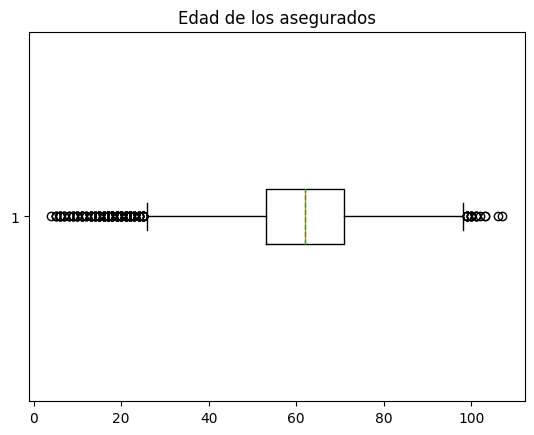

In [122]:
fig, ax = plt.subplots()
ax.boxplot(df_final1['Edad'], vert = False,showmeans = True, meanline = True)
plt.title('Edad de los asegurados')
plt.show()

In [124]:
#Calculo de percentiles
Q3 = df_final1['Edad'].quantile(0.75)
Q1 = df_final1['Edad'].quantile(0.25)
# IQR
iqr = Q3 - Q1

# Umbral superior e inferior
superior = Q3 + (1.5 * iqr)
inferior = Q1 - (1.5 * iqr)

# Subset the dataset
outliers = df_final1[(df_final1['Edad'] < inferior) | (df_final1['Edad'] > superior)]
outliers.sort_values(by='Edad', ascending=True)

,Edad,Sexo,Estado Civil,Producto Agrupado,Donde Vive,Tipo de Contrato,Tipo de siniestro,Desc. Diagnostico,Tipo de enfermedad,Ingreso al programa,Paga del asegurado,Costo del siniestro,SiniestrosXAsegurado
ID Afiliado,,,,,,,,,,,,,
10178,4.0,M,Soltero,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0,191,33,1
11006,5.0,M,Soltero,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,236,33,1
4318,5.0,F,Soltero,EPS,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0,249,158,1
9973,5.0,F,Soltero,EPS,L,PAGO POR SERVICIO,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0,356,641,1
4529,6.0,F,Soltero,AMC,L,PACIENTE MES REGULAR,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,192,52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978,102.0,M,Casado,EPS,L,PACIENTE MES HTA,PROGRAMAS CRONICOS,HIPERTENSION ARTERIAL (N346),Hipertension,1,363,484,3
3529,103.0,F,Soltero,AMC,L,PACIENTE MES REGULAR,AMBULATORIO,HIPERTENSION ARTERIAL (N346),Hipertension,0,279,1172,1
1273,103.0,M,Casado,EPS,L,PAGO POR SERVICIO,AMBULATORIO,DIABETES MELLITUS (N166),Diabetes,0,3153,5033,6


In [125]:
# Numero de outlaiers
print(f'Numero de outliers total: {len(outliers)}')

#Los dividimos en Outliers inferiores y superiores
outliers_inferiores = df_final1[(df_final1['Edad'] < inferior)]
outliers_superior=df_final1[(df_final1['Edad'] > superior)]
print('---Division de los outliers---')

print(f'Numero de outliers inferiores: {len(outliers_inferiores)}')
print(f'Numero de outliers superiores: {len(outliers_superior)}')

Numero de outliers total: 171
---Division de los outliers---
Numero de outliers inferiores: 150
Numero de outliers superiores: 21


In [126]:
outliers['Desc. Diagnostico'].value_counts()

,count
Desc. Diagnostico,
DIABETES MELLITUS (N166),111
HIPERTENSION ARTERIAL (N346),60
DIABETES INSIPIDA (N165),0
DIABETES MELLITUS EN EL EMBARAZO (N167),0
HIPERTENSION PULMONAR PRIMARIA (N347),0


##Resumen
De 171 casos totales de analizados como outliers 111 corresponden a diabetes y 60 a hipertension, 150 pertenecen al umbral inferior y 21 al umbral superior lo cual tiene correlacion con la cantidad de diabetes como de hipertension


En base a los resultados, vamos a dejar a los outliers dentro del analisis ya que las edades analizadas se corresponden con las enfermedades.   

In [127]:
import plotly.express as px

fig=px.histogram(df_final1[['Edad','Sexo']],x='Edad', nbins=10, color='Sexo', text_auto=True)

fig.show()

El grafico demuestra claramente que el rango etario se encuentra entre los 40 y 80 años y mas proporcion de hombres que de mujeres con la excepcion del rango entre 80 y 100 que son mas mujeres que hombres, lo cual puede deberse a que las mujeres, en promedio viven mas que los hombres. De la poblacion que supera los 80 años en proporcion, el 56% son mujeres y el 44% hombres


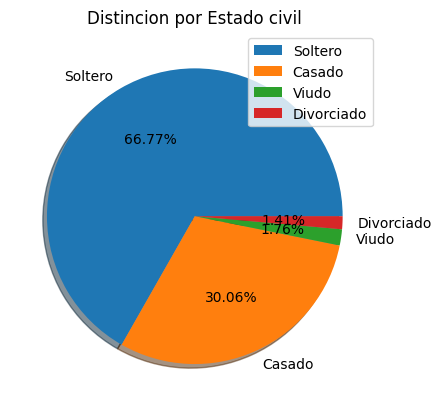

In [128]:
variable_cont=df_final1['Estado Civil'].value_counts()
etiquetas=df_final1['Estado Civil'].unique()
espacio=0,0.2
plt.pie(variable_cont, labels=etiquetas, autopct='%0.2f%%', shadow=True)
plt.title('Distincion por Estado civil')
plt.legend()
plt.show()

En este caso podemos ver que las personas con estado civil solteras son quienes mas denuncian esta clase de siniestros

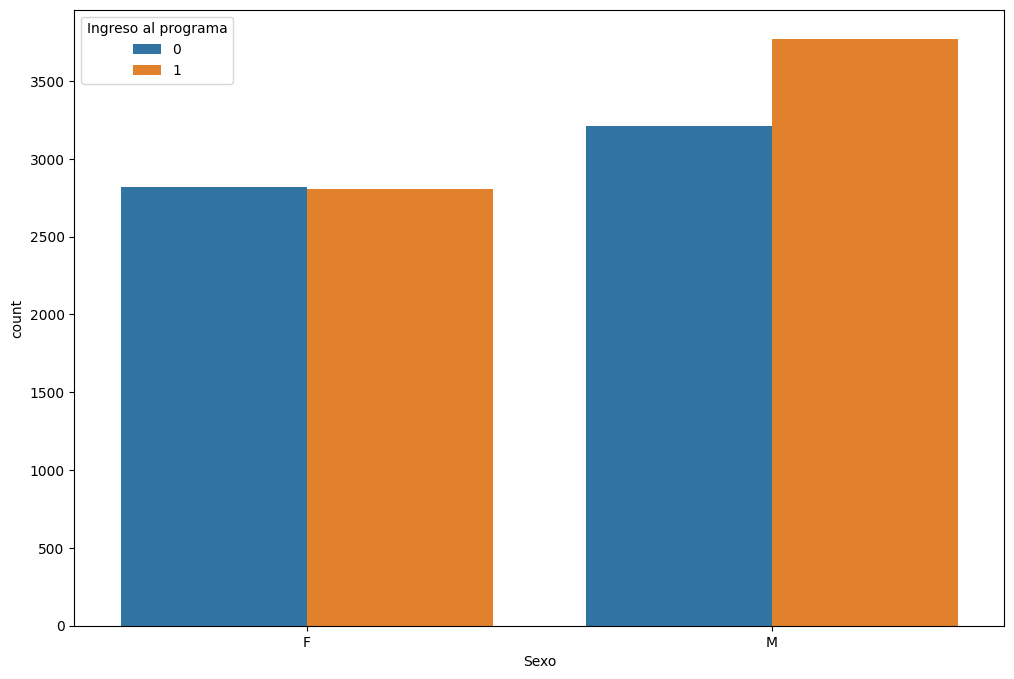

In [129]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Sexo', hue='Ingreso al programa', data=df_final1)
plt.show()

En este caso podemos ver de las personas que entran o no al programa no las define el sexo, en base a la cantidad es logico que sean mas honbres que mujeres

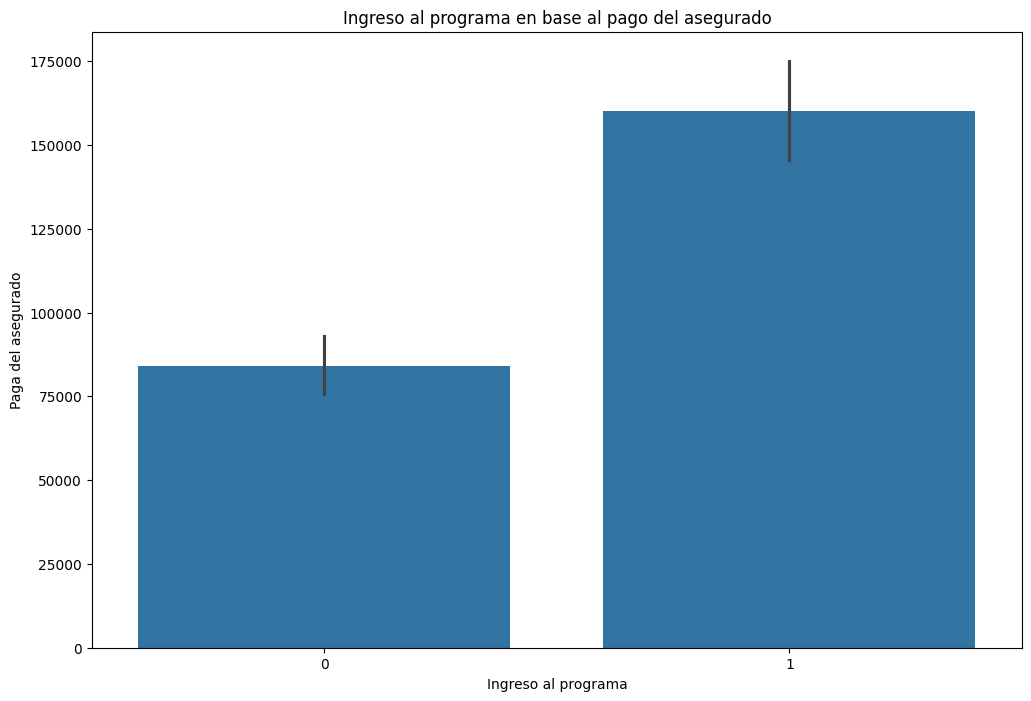

In [130]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_final1, x='Ingreso al programa', y='Paga del asegurado')
plt.title('Ingreso al programa en base al pago del asegurado')
plt.show()

Efectivamente vemos que existe relacion entre lo que paga el asegurado y los que ingresan al programa

## 6. Selecionar Feature

In [131]:
data_encoded = pd.get_dummies(df_final1, drop_first=True)

matriz_correlacion = data_encoded.corr()

Respuesta = matriz_correlacion['Ingreso al programa'].sort_values(ascending=False)

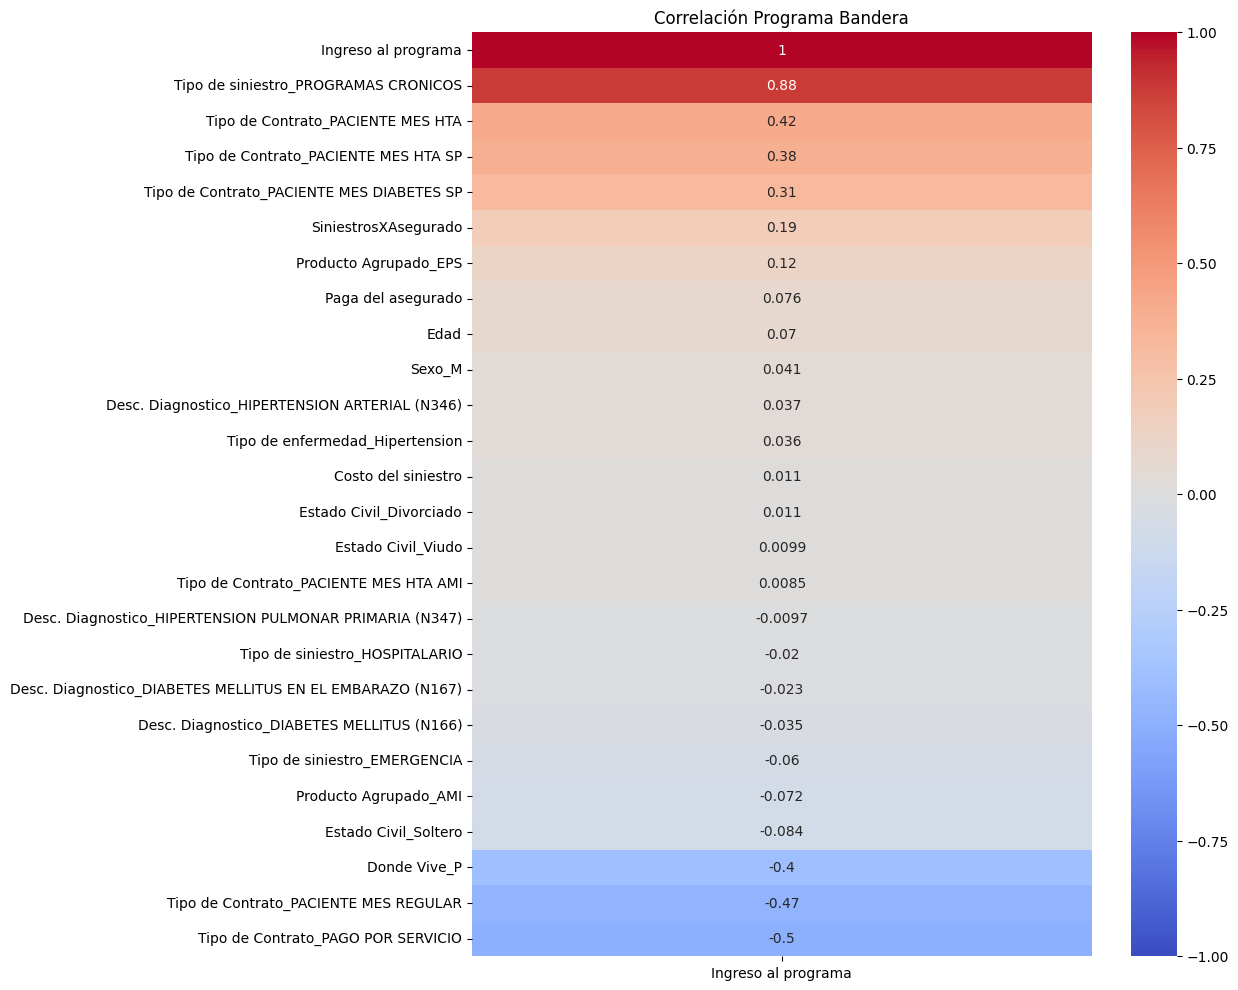

In [132]:
plt.figure(figsize=(10, 12))
sns.heatmap(Respuesta.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación Programa Bandera')
plt.show()

El **heatmap** que has generado muestra la **correlación de varias variables** con la variable de respuesta 'Ingreso al programa', que indica si un afiliado, ingresa o no al programa bandera. La escala de colores va de rojo a azul, cuanto mas se acerca al primero mas fuerte es la correlacion y a la inversa con el color azul.

###Usamos matriz de correlacion para la seleccion de caracteristicas
Por un lado utilizamos aquellas variables con correlacion positiva como Tipo de siniestro PROGRAMAS CRONICOS, Tipo de contrato PACIENTE MES HTA, tipo de contrato PACIENTE MES HTA SP, Tipo de contrato PACIENTE MES DABETES SP, como tambien aquellas con correlacion negativa como Tipo de contrato PACIENTE MES REGULAR,Tipo de contrato PAGO POR SERVICIO y Donde vive_P.

In [133]:
#Dentro de la columna agrupbenef, vemos que la correlacion mas fuerte es el de PROGRAMAS CRONICOS, por lo que procedemos a pasarla a numerico para poder realizar el coeficiente de pearson
df_final1['Programa Cronico'] = df_final1['Tipo de siniestro'].apply(lambda x: 1 if x == 'PROGRAMAS CRONICOS' else 0)

In [134]:
correlacion = df_final1['Ingreso al programa'].corr(df_final1['Programa Cronico'], method='pearson')
print("Índice de correlación de Pearson entre 'Ingreso al programa' y 'Programa Cronico':", correlacion)

Índice de correlación de Pearson entre 'Ingreso al programa' y 'Programa Cronico': 0.878044951979555


Interpretacion: Nos indica que el programa cronico, es el que tiene correlacion mas fuerte